In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
test = pd.read_csv("Testing.csv")
train = pd.read_csv("Training.csv")

In [3]:
# Drop duplicates
train = train.drop_duplicates()
test = test.drop_duplicates()

In [4]:
# Drop rows with missing values
train = train.dropna()
test = test.dropna()

In [5]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
x_test = test.iloc[:, 0:-1].values
y_test = test.iloc[:, -1].values
x_train = train.iloc[:, 0:-1].values
y_train = train.iloc[:, -1].values

In [8]:
symptom_names = list(test.columns)[:-1]

In [9]:
# Encode categorical data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [10]:
# Seed the random number generator for reproducibility
np.random.seed(42)

In [11]:
# Train the model
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10)

In [12]:
# Prediction and accuracy test
y_predict_train = rfc.predict(x_train)
y_predict_test = rfc.predict(x_test) 


In [13]:
# Display training and testing accuracy
training_accuracy = accuracy_score(y_train, y_predict_train)
testing_accuracy = accuracy_score(y_test,y_predict_test)
print(f"\nTraining Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [14]:
# # Display confusion matrix for testing data
# conf_matrix_test = confusion_matrix(y_test, np.argmax(y_predict_test, axis=1))
# print("\nConfusion Matrix for Updated Testing Data:")
# print(conf_matrix_test)

In [15]:
# # Plot Confusion Matrix for Updated Testing Data using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix -Testing Data')
# plt.savefig('confusion_matrix.png')
# plt.show()

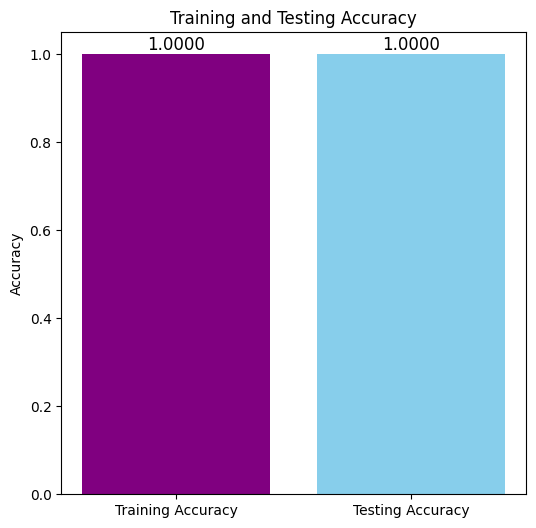

In [16]:
# Plot Training and Testing Accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy, testing_accuracy]

plt.figure(figsize=(6,6))
bars = plt.bar(labels, values, color=['purple', 'skyblue'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

# Add text annotations above the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.01, f'{value:.4f}', ha='center', color='black', fontsize=12)

# # Display total number of training and testing data
# plt.text(1.5, -0.15, f'Total Train Data: {len(train)}\nTotal Test Data: {len(test)}', ha='center', color='black', fontsize=12)

plt.savefig('accuracy_bar_chart.png')
plt.show()


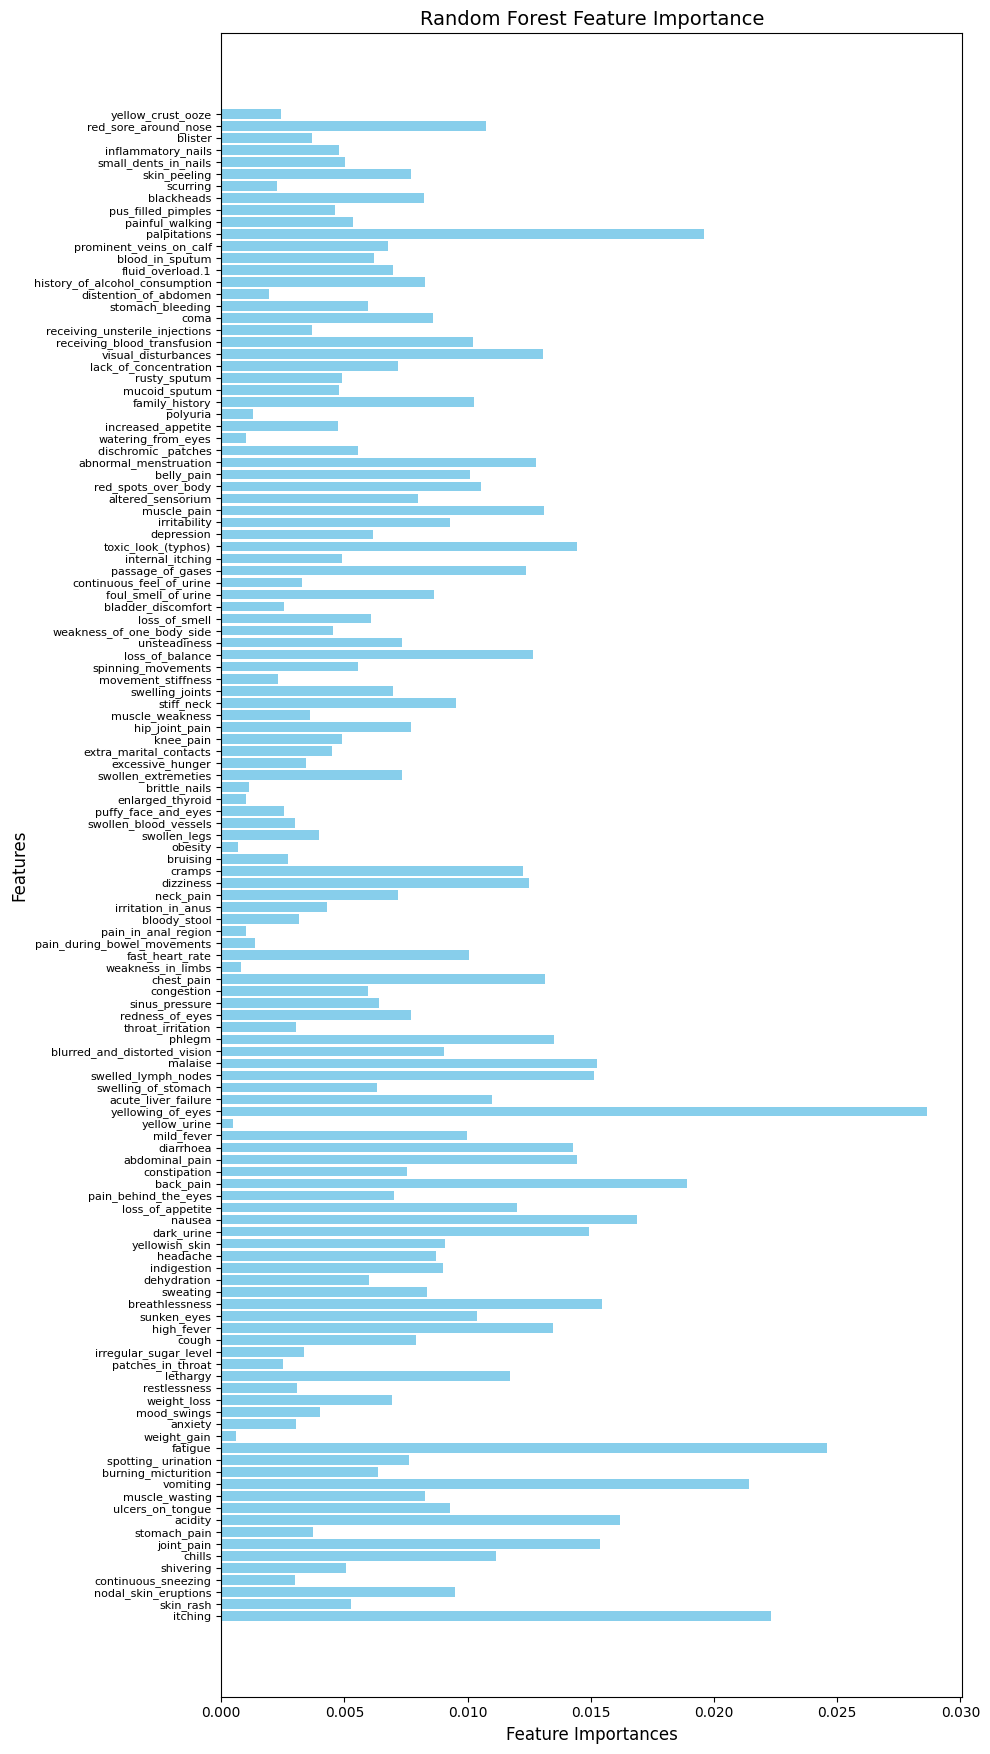

In [17]:
# Plot Feature Importance with increased gaps between features and exclude features with zero importance
feature_importance = rfc.feature_importances_
feature_names = list(test.columns)[:-1]

# Filter out features with zero importance
non_zero_features = [feature for feature, importance in zip(feature_names, feature_importance) if importance > 0]

plt.figure(figsize=(10, len(non_zero_features) * 0.14))
plt.barh(range(len(non_zero_features)), [importance for importance in feature_importance if importance > 0], align='center', color='skyblue', height=0.8)  # Increase height for more gap
plt.yticks(range(len(non_zero_features)), non_zero_features, fontsize=8)  # Adjust font size
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()